# Hadoop Supplementary Information

**What is Apache Hadoop?**<br>
It is an open source software framework for storage and large scale processing of data-sets on clusters of commodity hardware. Commodity hardware are computer systems that are manufactured by multiple vendors incorporating components based on open standards.

## Topic

* Apache Hadoop framework
* HDFS and MapReduce
* YARN (additional)
* Zookeeper (additional)
* Hadoop Architecture in Detail
* What make Hadoop Popular, The Advantages and Disadvantages

---

## Apache Hadoop framework

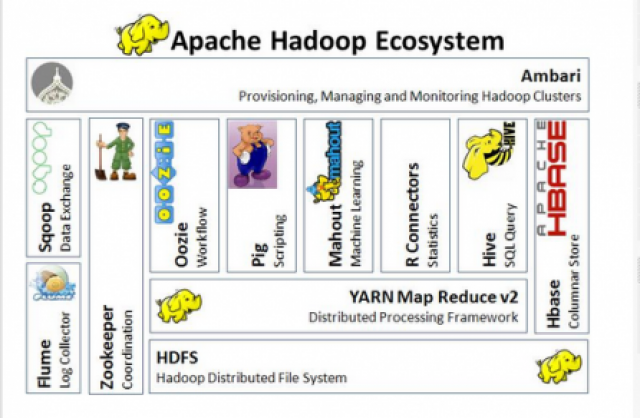

**4 main parts**

1. **Hadoop Common** - contains libraries and utilities needed by other Hadoop modules
2. **Hadoop Distributed File System (HDFS)** - a distributed file-system that stores data on the commodity machines, providing very high aggregate bandwidth across the cluster
3. **Hadoop YARN** - YARN stands for Yet Another Resource Negotiator. It is a resource-management platform responsible for managing compute resources in clusters and using them for scheduling of users' applications
4. **Hadoop MapReduce** - a programming model and big data processing engine, used for parallel processing of large data sets.

**Note that Apache Hadoop is mainly written in Java!**

## HDFS and MapReduce

These are the two primary components at the core of Apache Hadoop 1.x, **Hadoop Distributed File System (HDFS)** and the **MapReduce** parallel processing framework.

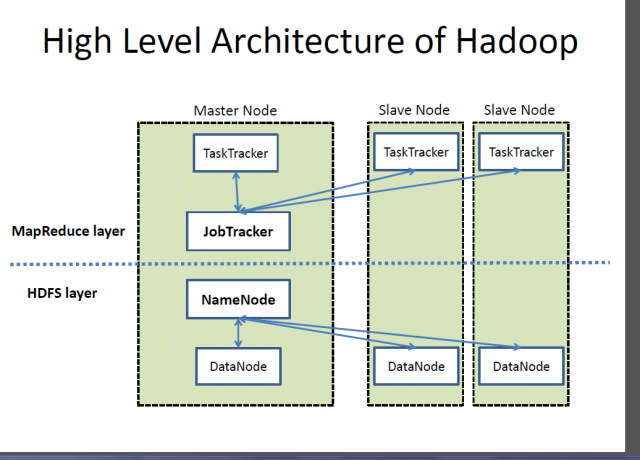

### Hadoop Distributed File System (HDFS)

* Distributed, scalable, and portable file-system written in Java for the Hadoop framework
* Each node in a Hadoop instance typically has a single namenode, and a cluster of datanodes from the HDFS cluster.
* Each datanode serves up blocks of data over the network using a block protocol specific to HDFS.
* File system uses the TCP/IP layer for communication.
* Clients use Remote procedure call (RPC) to communicate between each other.

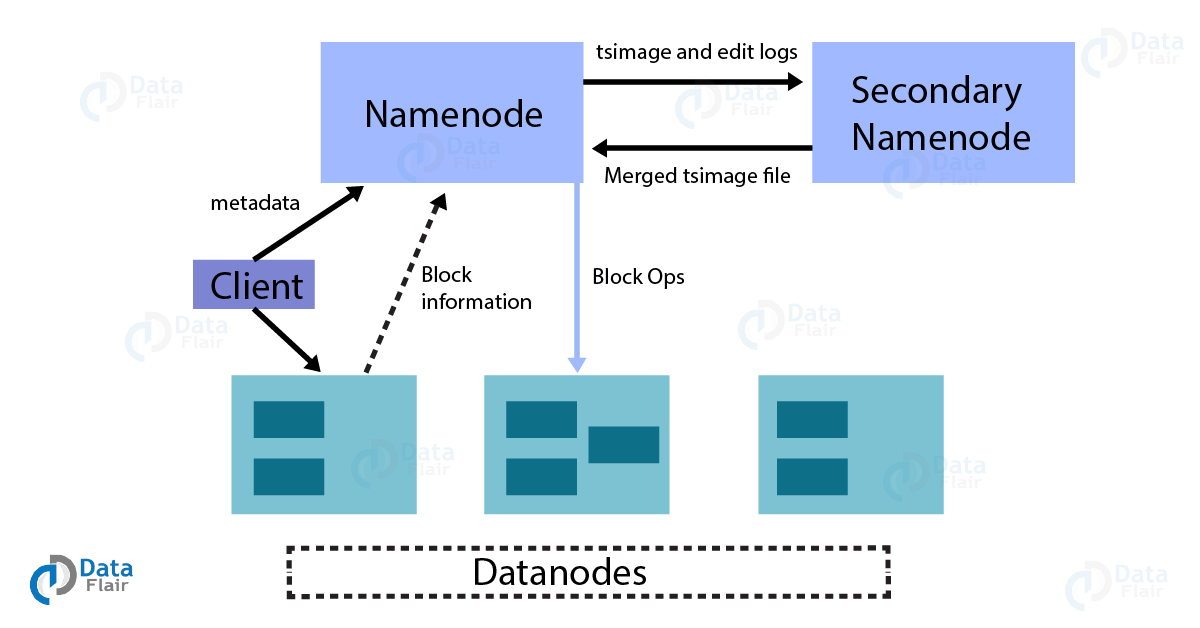

#### Properties of HDFS

* Stores large files (typically in the range of gigabytes to terabytes) across multiple machines.
* Achieves reliability by replicating the data across multiple hosts, therefore it does not require RAID storage on hosts.
  * For example, if the replication value is 3, data is stored on three nodes; two on the same rack, and one on a different rack. Data nodes can talk to each other to rebalance data, to move copies around, and to keep the replication of data high.
* Added the high-availability capabilities for release 2.x, allowing the main metadata server (the NameNode) to be failed over manually to a backup in the event of failure, called automatic fail-over. Auto in release 3.x.
  * This means that there is a so-called secondary namenode that regularly connects with the primary namenode and builds snapshots of the primary namenode's directory information (which it saves to local or remote directories).
  * These checkpointed images can be used to restart a failed primary namenode.

### MapReduce

* Data processing component of Hadoop.
* Applies the computation on sets of data in parallel
* 2 phases:
  * **Map Phase** – This phase takes input as key-value pairs and produces output as key-value pairs. It can write custom business logic in this phase. Map phase processes the data and gives it to the next phase.
  * **Reduce Phase** – The MapReduce framework sorts the key-value pair before giving the data to this phase. This phase applies the summary type of calculations to the key-value pairs.

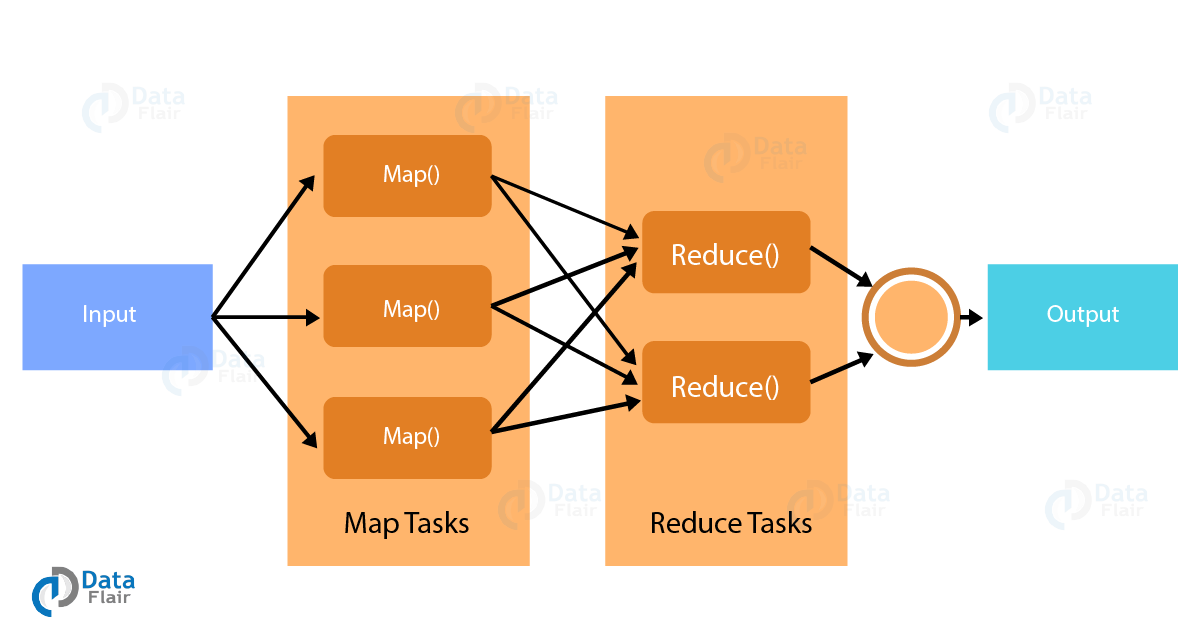

## YARN (additional)

* Short for Yet Another Resource Manager.
* It is like the operating system of Hadoop as it monitors and manages the resources.
* Has two main components:
  * Node Manager - Per-node agent and takes care of the individual compute nodes in a Hadoop cluster. It monitors the resource usage like CPU, memory etc. of the local node and intimates the same to Resource Manager.
  * Resource Manager - Responsible for tracking the resources in the cluster and scheduling tasks like map-reduce jobs.

## Zookeeper (additional)

It coordinates between various services in the Hadoop ecosystem thereby saving time required for synchronization, configuration maintenance, grouping, and naming.

Features include:
* **Speed** – Zookeeper is fast in workloads where reads to data are more than write. A typical read: write ratio is 10:1.
* **Organized** – Zookeeper maintains a record of all transactions.
* **Simple** – It maintains a single hierarchical namespace, similar to directories and files.
* **Reliable** – We can replicate Zookeeper over a set of hosts and they are aware of each other. There is no single point of failure. As long as major servers are available zookeeper is available.

**Why do Zookeeper is used in Hadoop?** <br>
As a distributed application, Hadoop will face problems like **deadlocks** and **race conditions**.

* Deadlock occurs when **two or more tasks fight for the same resource**. For instance, task T1 has resource R1 and is waiting for resource R2 held by task T2. And task T2 is waiting for resource R1 held by task T1. Both task T1 and T2 would get locked waiting for resources. Zookeeper solves Deadlock condition via synchronization.

* Race condition occurs when the machine tries to perform **two or more operations at a time**. Zookeeper solves this problem by property of serialization.

## Hadoop Architecture in Detail

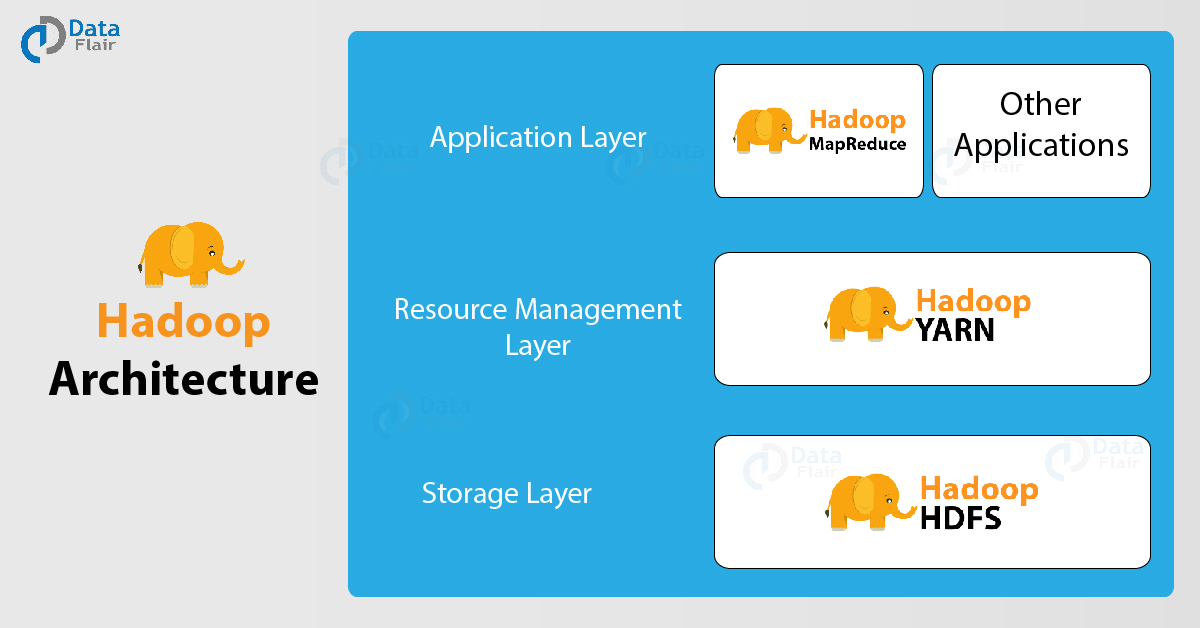

**Master-slave topology** where there is one master node and multiple slave nodes. Master node’s function is to **assign a task** to various slave nodes and **manage resources**. The slave nodes do the **actual computing**. Slave nodes store the real data whereas on master we have metadata (ie it stores data about data). 

From the picture above, we can see that Hadoop architecture comprises of 3 major layers.

### HDFS

It provides for **data storage** of Hadoop. HDFS splits the data unit into smaller units called **blocks** and stores them in a distributed manner. It has got two daemons running. One for master node (NameNode) and other for slave nodes (DataNode).

#### NameNode and DataNode

* NameNode is responsible for Namespace management and regulates file access by the client.
* DataNode is responsible for storing actual business data.

Internally, a file gets split into a number of data blocks and stored on a group of slave machines. NameNode manages modifications to file system namespace such as opening, closing and renaming files or directories. NameNode also keeps track of mapping of blocks to DataNodes. DataNodes serves read/write request from the file system’s client. It also creates, deletes and replicates blocks on demand from NameNode.

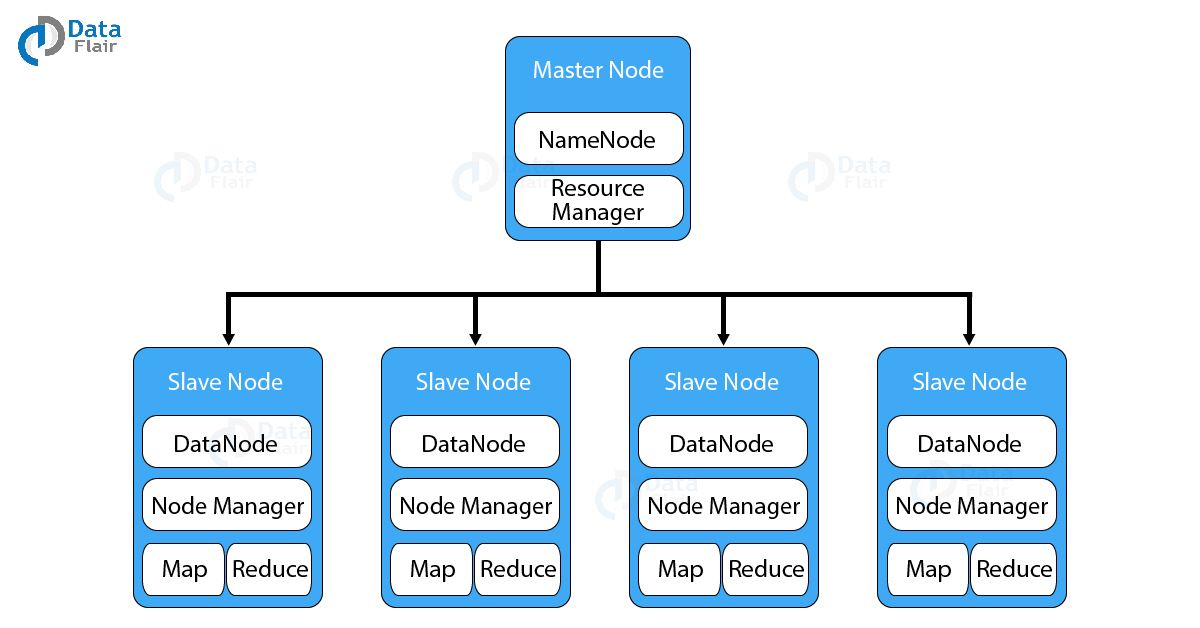

Since Java is the native language of Hadoop, DataNode and NameNode can be deployed on machines that have Java installed. In a typical deployment, there is one dedicated machine running NameNode. And all the other nodes in the cluster run DataNode. The NameNode contains metadata like the location of blocks on the DataNodes. And arbitrates resources among various competing DataNodes.

#### Block in HDFS

Block refers to the smallest unit of storage on a computer system. It is the **smallest contiguous storage** allocated to a file. In Hadoop, the **default block size is either 128MB or 256 MB**.

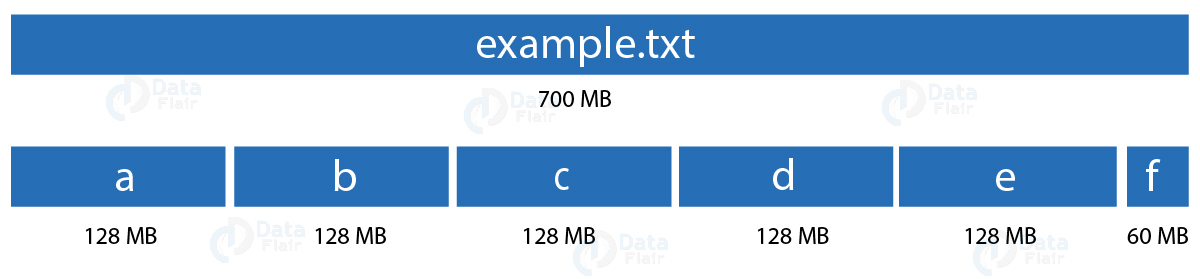

**One should select the block size very carefully.** To explain why, let us take an example of a file which is 700MB in size. If our block size is 128MB then HDFS divides the file into 6 blocks. Five blocks of 128MB and one block of 60MB. However, if we have a block size of 4KB, that 700MB file would create huge metadata which will overload the NameNode.

#### Replication Management

To provide fault tolerance HDFS uses a replication technique. In that, it makes copies of the blocks and stores in on different DataNodes. Replication factor decides **how many copies of the blocks get stored**. It is **by default 3** but we can configure to any value.

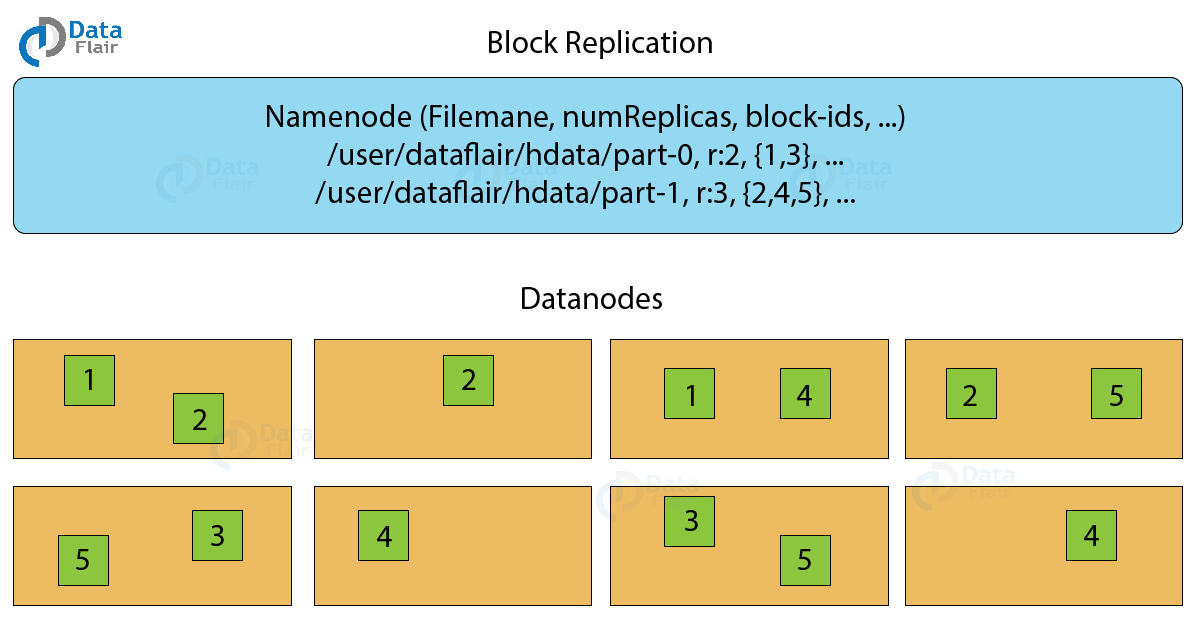

For example, the figure above shows how the replication technique works. Suppose we have a file of 1GB then with a replication factor of 3 it will require 3GBs of total storage.

To maintain the replication factor NameNode collects block report from every DataNode. Whenever a block is under-replicated or over-replicated the NameNode adds or deletes the replicas accordingly.

#### Rack Awareness

We know that HDFS stores files across multiple nodes (DataNodes) in a cluster. To get the maximum performance from Hadoop and to improve the network traffic during file read/write, NameNode chooses the DataNodes on the same rack or nearby racks for data read/write. **Rack awareness is the concept of choosing the closer DataNode based on rack information**.

The **Rack is the collection of around 40-50 DataNodes connected using the same network switch**. If the network goes down, the whole rack will be unavailable. A large Hadoop cluster is deployed in multiple racks. Communication between the DataNodes on the same rack is more efficient as compared to the communication between DataNodes residing on different racks.

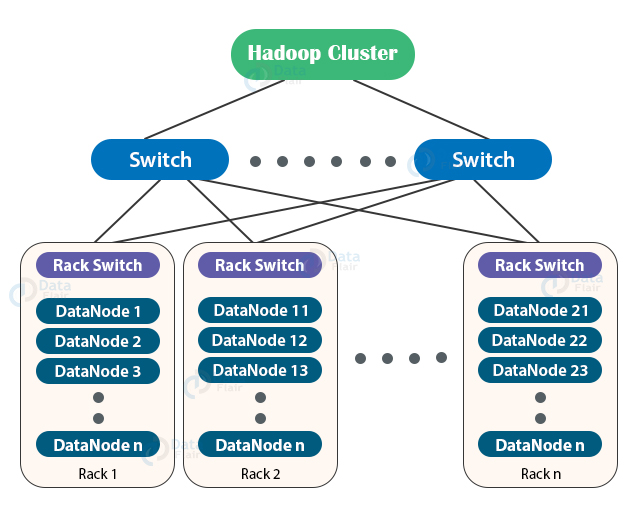

To reduce the network traffic during file read/write, NameNode chooses the closest DataNode for serving the client read/write request. NameNode maintains rack ids of each DataNode to achieve this rack information.

Purpose of Rack Awareness is for:
1. To reduce the network traffic while file read/write, which improves the cluster performance.
2. To achieve fault tolerance, even when the rack goes down.
3. Achieve high availability of data so that data is available even in unfavorable conditions.
4. To reduce the latency, that is, to make the file read/write operations done with lower delay.

### MapReduce

It is the **data processing layer** of Hadoop. It is a software framework that allows developers to write applications for processing large amounts of data. MapReduce runs these applications in parallel on a cluster of low-end machines. MapReduce job comprises a number of **map tasks** and **reduces tasks**. Each task works on a part of data. This distributes the load across the cluster. 

* Map tasks is to load, parse, transform and filter data. 
* Reduce tasks works on the subset of the output from the map tasks. Reduce tasks applies grouping and aggregation to this intermediate data from the map tasks.

The input format decides how to split the input file into input splits. This input split gets loaded by the map task. The map task runs on the node where the relevant data is present. The data need not move over the network and get processed locally.

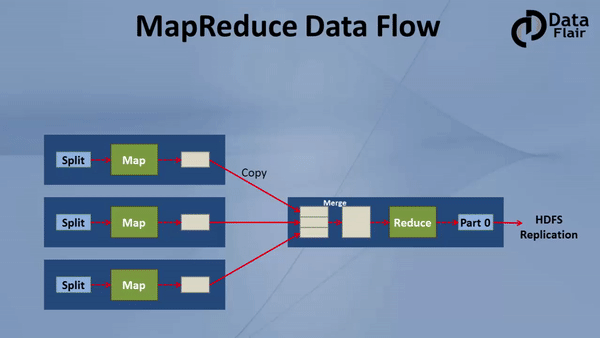

#### Map Tasks

Within the Map tasks, it runs the following phases:

1. **RecordReader** - transforms the input split into records. It parses the data into records but does not parse records itself. It provides the data to the mapper function in key-value pairs.

2. **Mapper** - the user-defined function that processes the key-value pair from the recordreader. It produces zero or multiple intermediate key-value pairs.
   
   The decision of what will be the key-value pair lies on the mapper function. The key is usually the data on which the reducer function does the grouping operation. And value is the data which gets aggregated to get the final result in the reducer function.

3. **Combiner** - optional phase. It is a localized reducer that groups the data in the map phase. It takes the intermediate data from the mapper and aggregates them. It does so within the small scope of one mapper. In many situations, this decreases the amount of data needed to move over the network. Combiner provides extreme performance gain with no drawbacks. However, the combiner is not guaranteed to execute. Hence it is not part of the overall algorithm.
   
   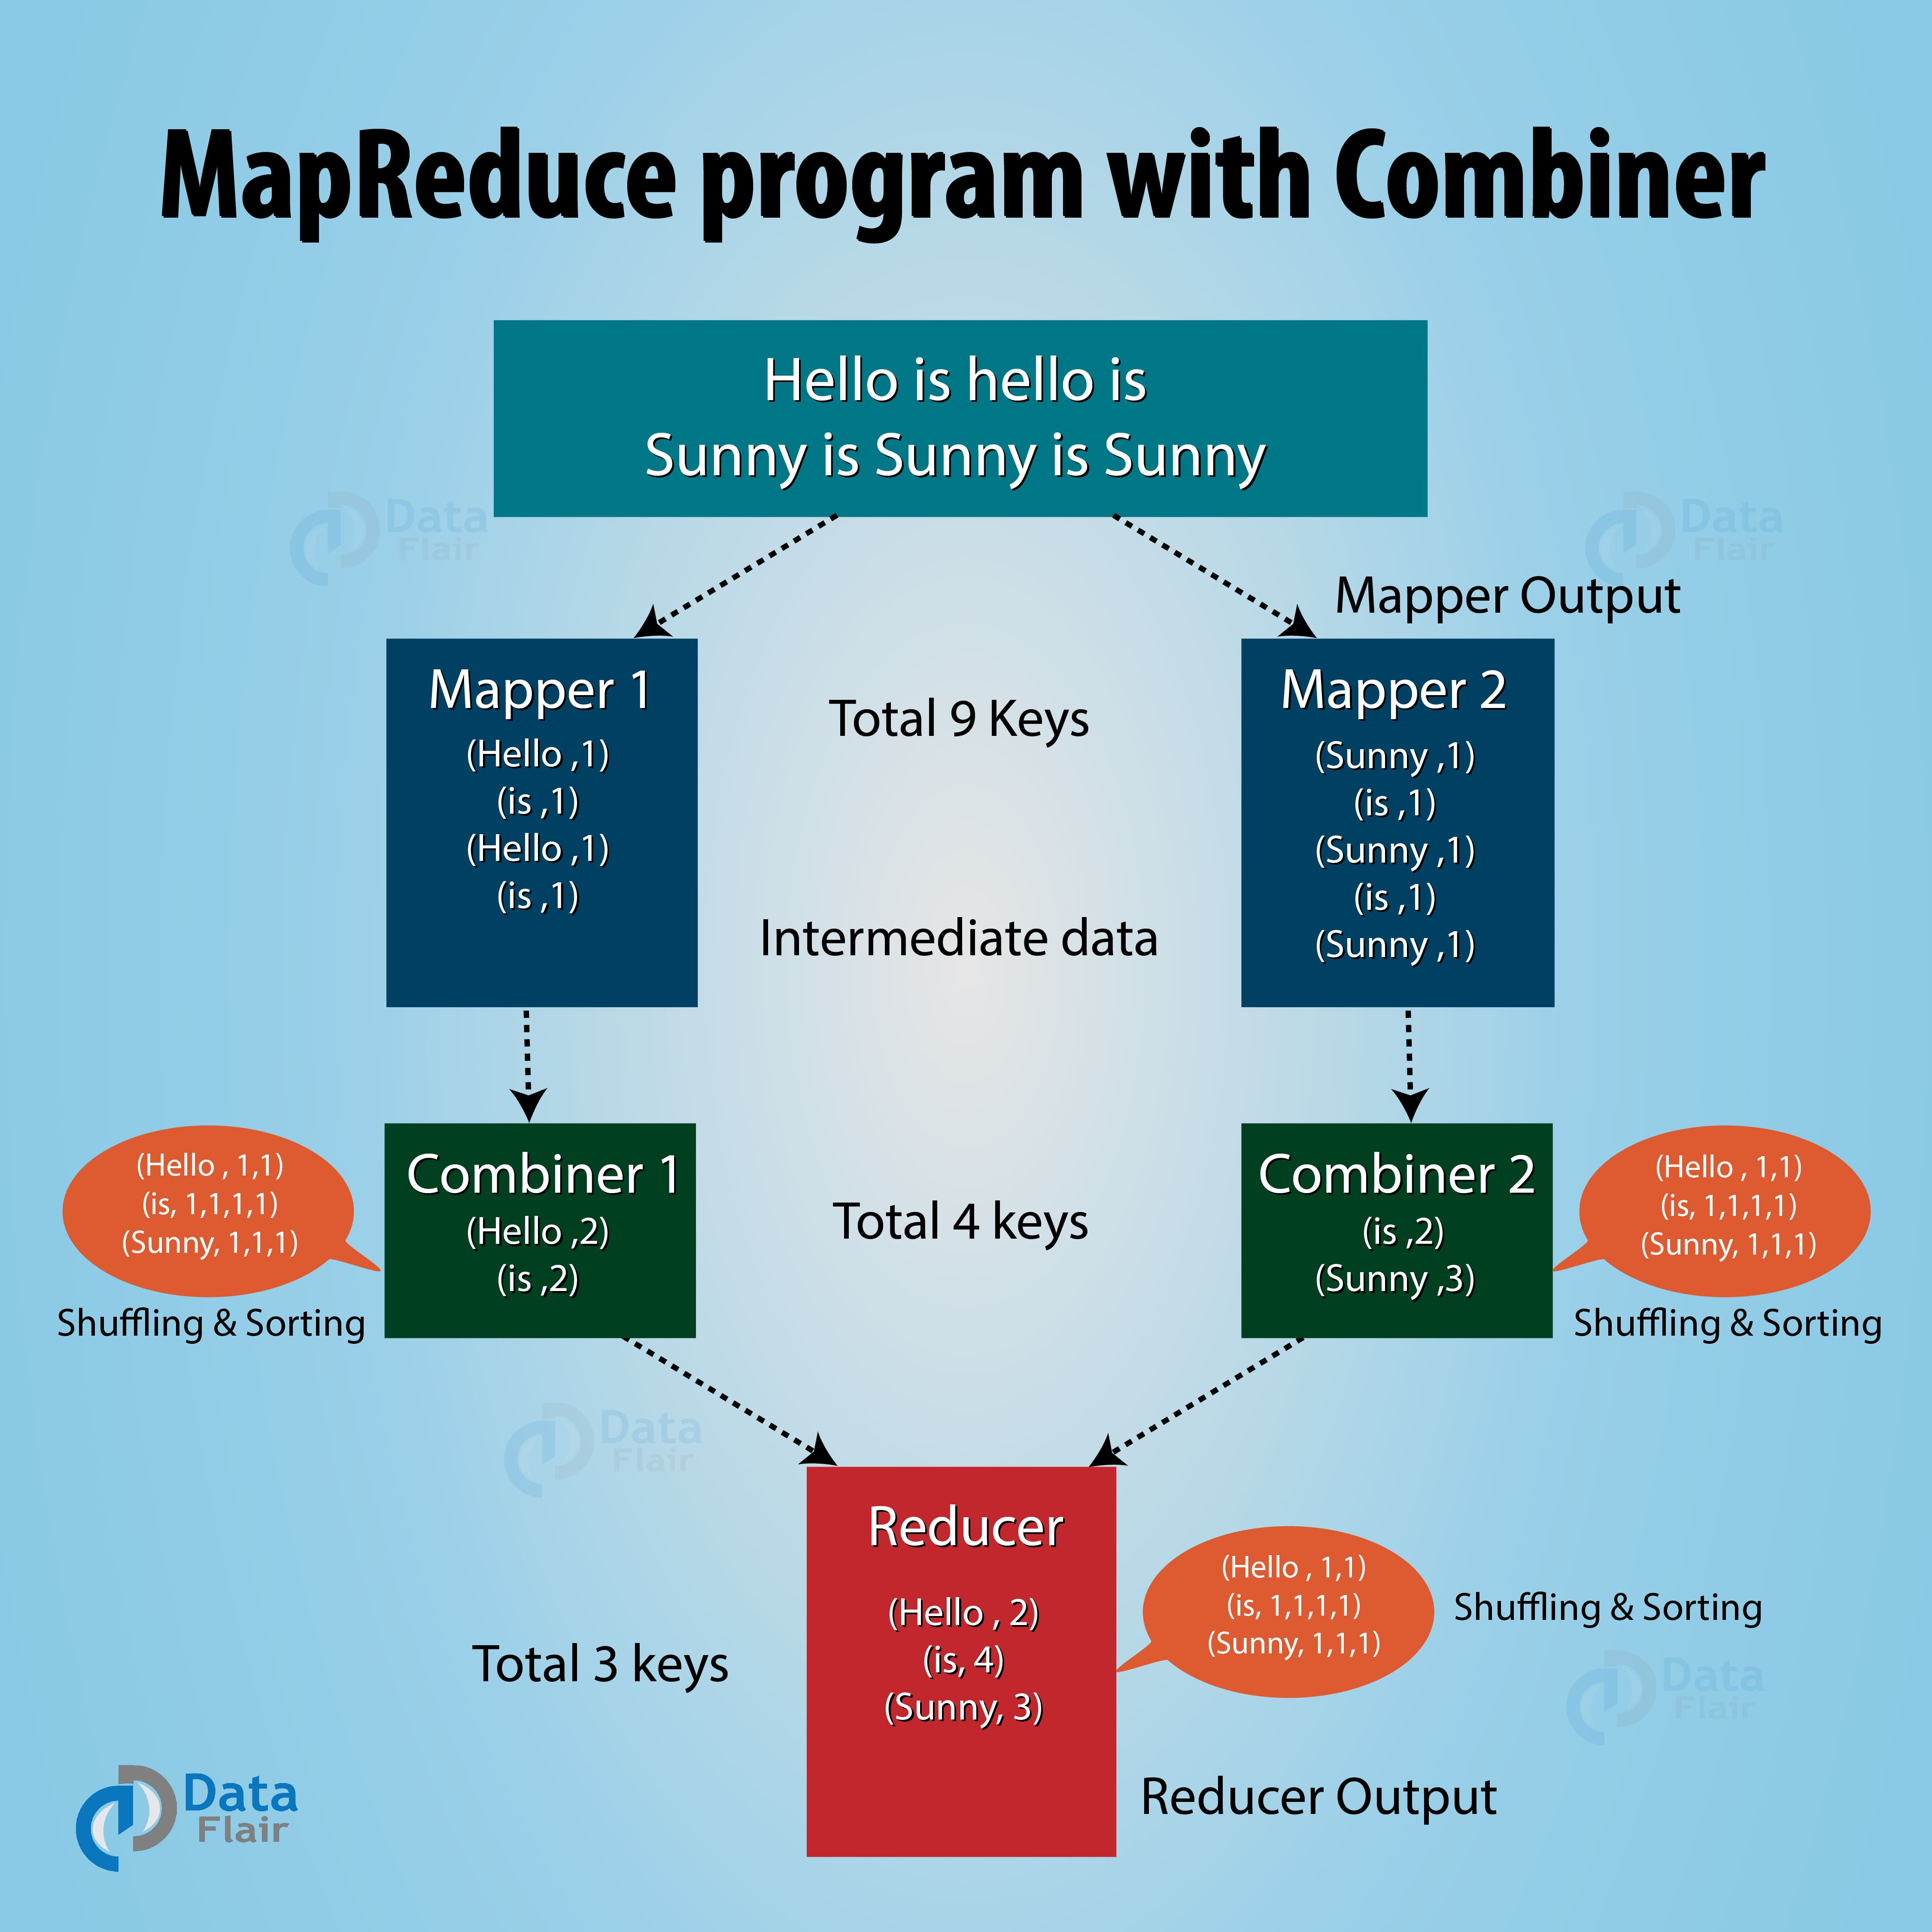

4. **Partitioner** - redirects the mapper output to the reducer by determining which reducer is responsible for that particular key. By default, the partitioner performs a modulus operation of the hashcode of the key with the number of reducers. This distributes the keyspace evenly over the reducers. It also ensures that key with the same value but from different mappers end up into the same reducer.

#### Reduce Tasks

Within the Reduce tasks, it runs the following phases:

1. **Shuffle and Sort** - This step downloads the data written by partitioner to the machine where reducer is running. It sorts the individual data pieces into a large data list. The purpose of this sort is to collect the equivalent keys together. The framework does this so that we could iterate over it easily in the reduce task. This phase is **not customizable**. The framework handles everything automatically. However, the developer has control over how the keys get sorted and grouped through a comparator object.

2. **Reduce** - performs the reduce function once per key grouping. The framework passes the function key and an iterator object containing all the values pertaining to the key. The reducer can be written to filter, aggregate and combine data in a number of different ways. Once the reduce function gets finished it gives zero or more key-value pairs to the outputformat. Like map function, reduce function changes from job to job. 

3. **OutputFormat** - This is the final step. It takes the key-value pair from the reducer and writes it to the file by recordwriter. By default, it separates the key and value by a tab and each record by a newline character. We can customize it to provide richer output format before the data is written to the HDFS.

  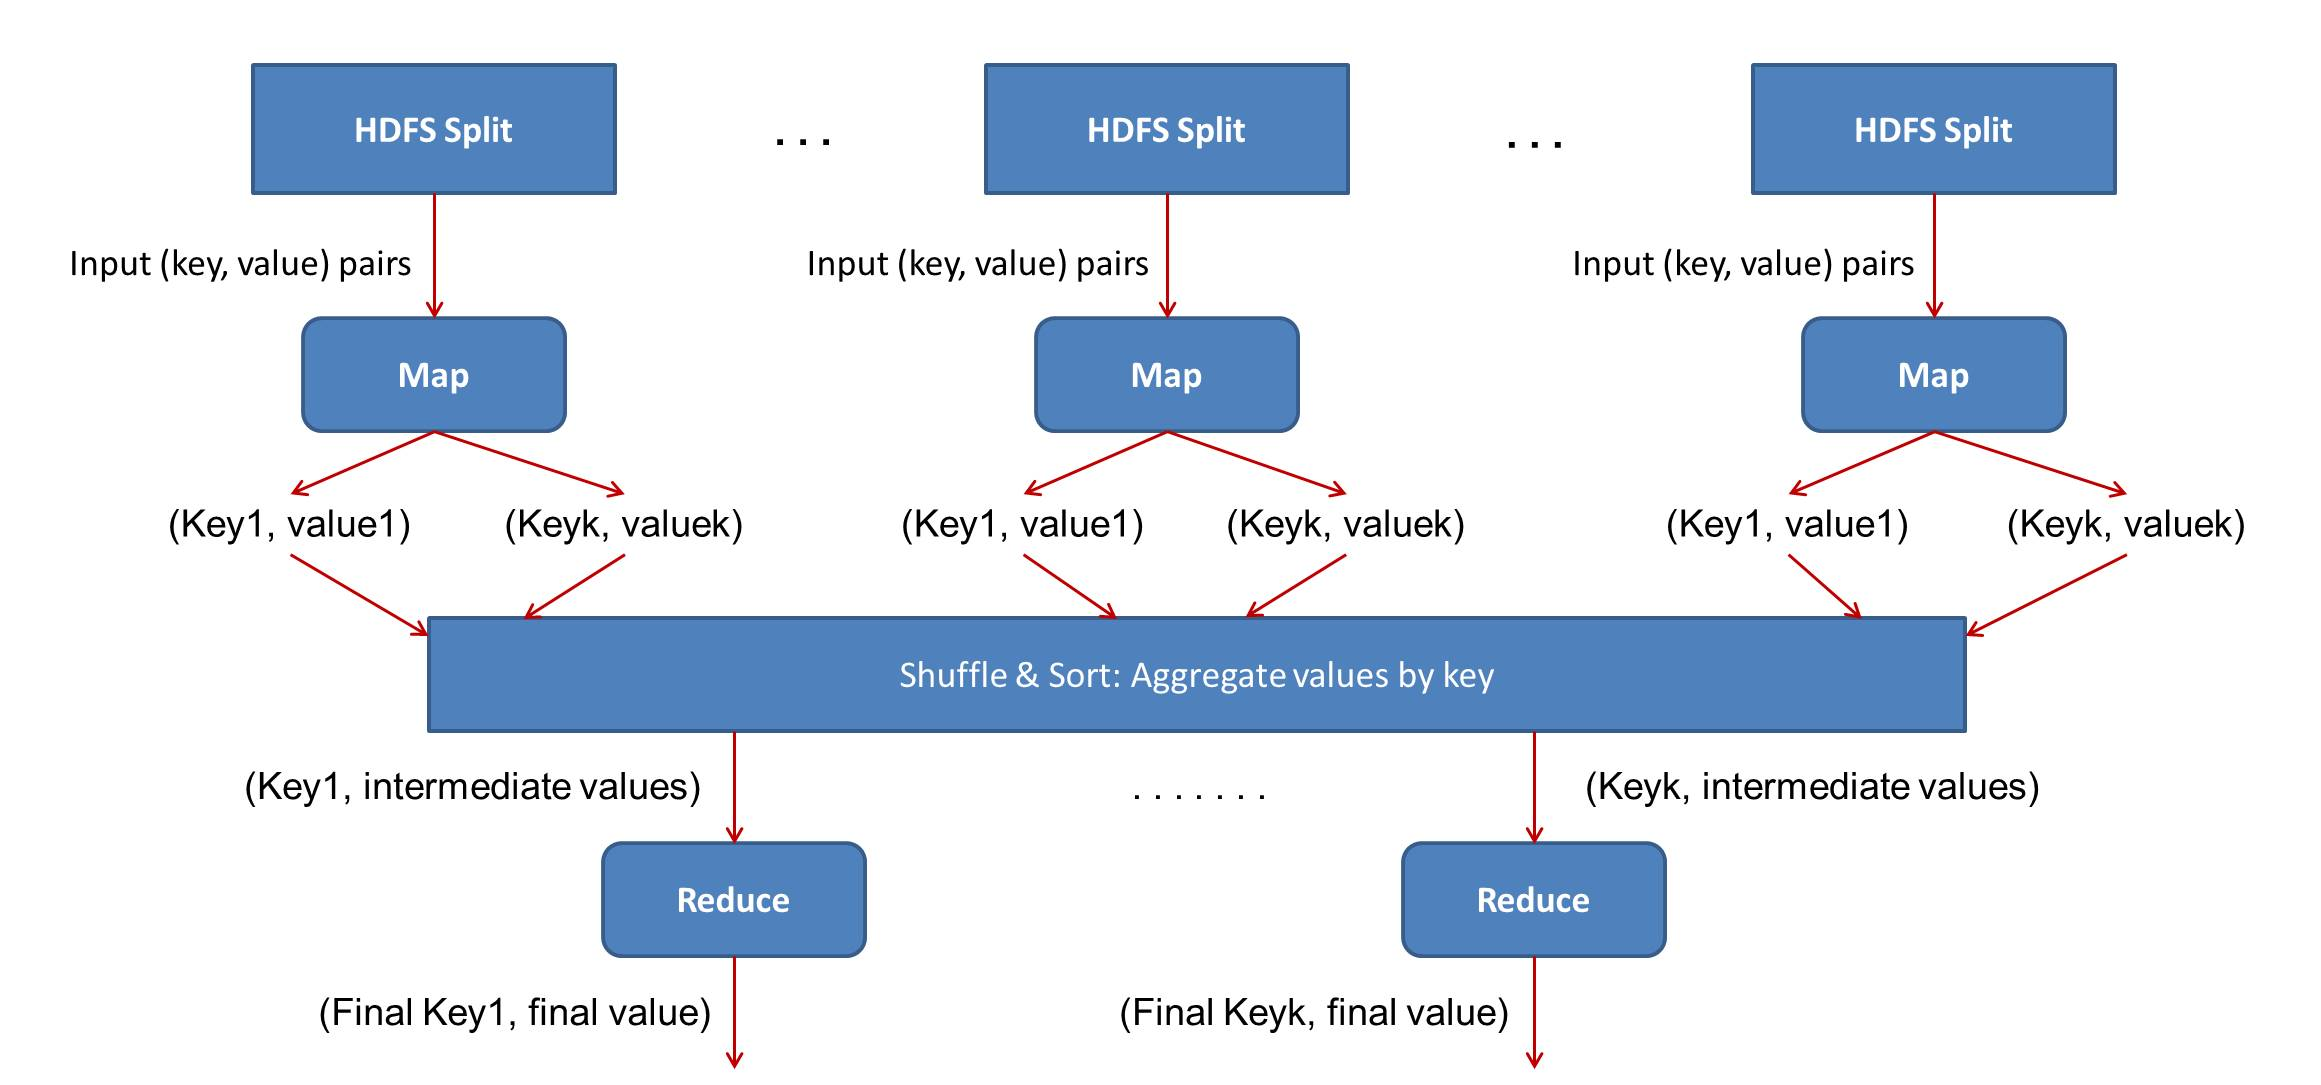

### Yarn (additional)

YARN or Yet Another Resource Negotiator is the **resource management layer** of Hadoop. The basic principle behind YARN is to separate resource management and job scheduling/monitoring function into separate daemons. In YARN there is one global ResourceManager and per-application ApplicationMaster. An application can be a single job or a DAG of jobs.

Inside the YARN framework, we have two daemons **ResourceManager** and **NodeManager**. The ResourceManager arbitrates resources among all the competing applications in the system. The job of NodeManger is to monitor the resource usage by the container and report the same to ResourceManger. The resources are like CPU, memory, disk, network and so on.

The ApplcationMaster negotiates resources with ResourceManager and works with NodeManger to execute and monitor the job.

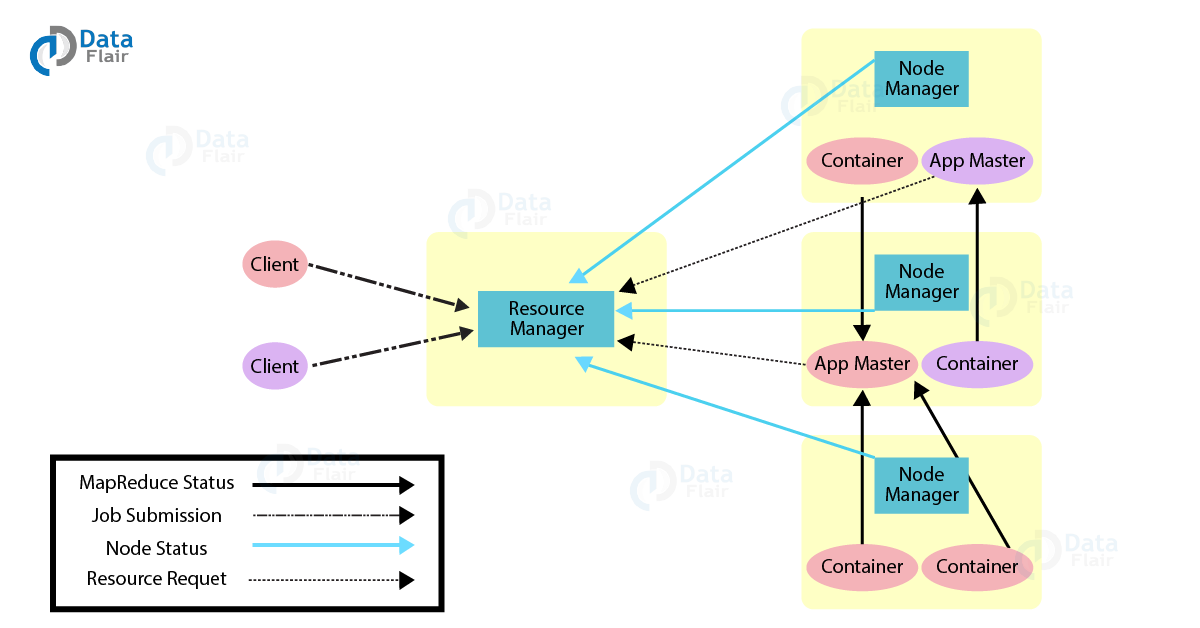

The ResourceManger has two important components:

1. **Scheduler** - responsible for allocating resources to various applications. This is a pure scheduler as it does not perform tracking of status for the application. It also does not reschedule the tasks which fail due to software or hardware errors. The scheduler allocates the resources based on the requirements of the applications.

2. **Application Manager** - it accepts the job submission, negotiates the first container for executing (ApplicationMaster) and restarts the ApplicationMaster container on failure. The container incorporates elements such as CPU, memory, disk, and network.

   The ApplicationMaster negotiates the resource container from the Scheduler, tracks the resource container status and monitors progress of the application.

## What make Hadoop Popular, The Advantages and Disadvantages

**Advantages**

1. **Open Source** - Hadoop is an open source technology i.e. its source code is freely available. We can modify the source code to suit a specific requirement.

2. **Scalable** - Hadoop works on the principle of horizontal scalability. Nodes can be added to Hadoop cluster on the fly making it a scalable framework.

3. **Fault Tolerant** - In Hadoop 3.0 fault tolerance is provided by erasure coding. For example, 6 data blocks produce 3 parity blocks by using erasure coding technique, so HDFS stores a total of these 9 blocks. In event of failure of any node the data block affected can be recovered by using these parity blocks and the remaining data blocks.

4. **Highly Available** - In Hadoop 2.x, HDFS architecture has a single active NameNode and a single Standby NameNode, so if a NameNode goes down then we have standby NameNode to count on. But Hadoop 3.0 supports multiple standby NameNode making the system even more highly available as it can continue functioning in case if two or more NameNodes crashes.

5. **Cost Effective** - Hadoop is an economical solution as it uses a cluster of commodity hardware to store data. In Hadoop 3.0 we have only 50% of storage overhead as opposed to 200% in Hadoop2.x. This requires less machine to store data as the redundant data decreased significantly.

6. **Varied Data Sources** - Hadoop accepts a variety of data. Data can come from a range of sources like email conversation, social media etc. and can be of structured or unstructured form. Hadoop can derive value from diverse data. Hadoop can accept data in a text file, XML file, images, CSV files etc.

7. **Ease of use** - The Hadoop framework takes care of parallel processing, MapReduce programmers does not need to care for achieving distributed processing, it is done at the backend automatically.

8. **Data Locality** - The concept of Data Locality is used to make Hadoop processing fast. In the data locality concept, the computation logic is moved near data rather than moving the data to the computation logic. The cost of Moving data on HDFS is costliest and with the help of the data locality concept, the bandwidth utilization in the system is minimized.

9. **Performance & High Throughput** - Hadoop with its distributed processing and distributed storage architecture processes huge amounts of data with high speed. In DFS(Distributed File System) a large size file is broken into small size file blocks then distributed among the Nodes available in a Hadoop cluster, as this massive number of file blocks are processed parallelly which makes Hadoop faster.

10. **Low Network Traffic** - In Hadoop, each job submitted by the user is split into a number of independent sub-tasks and these sub-tasks are assigned to the data nodes thereby moving a small amount of code to data rather than moving huge data to code which leads to low network traffic.

11. **Compatibility** - Most of the emerging technology of Big Data is compatible with Hadoop like Spark, Flink etc. They have got processing engines which work over Hadoop as a backend i.e. Hadoop is used as data storage platforms for them.

12. **Multiple Languages Supported** - Developers can code using many languages on Hadoop like C, C++, Perl, Python, Ruby, and Groovy.


**Disadvantages**

1. **Issue With Small Files** - Hadoop is suitable for a small number of large files but when it comes to the application which deals with a large number of small files, Hadoop fails here. A small file is nothing but a file which is significantly smaller than Hadoop’s block size which can be either 128MB or 256MB by default. These large number of small files overload the Namenode as it stores namespace for the system and makes it difficult for Hadoop to function.

2. **Vulnerable By Nature** - Hadoop is written in Java which is a widely used programming language hence it is easily exploited by cyber criminals which makes Hadoop vulnerable to security breaches.

3. **Processing Overhead** - In Hadoop, the data is read from the disk and written to the disk which makes read/write operations very expensive when we are dealing with tera and petabytes of data. Hadoop cannot do in-memory calculations hence it incurs processing overhead.

4. **Supports Only Batch Processing** - At the core, Hadoop has a batch processing engine which is not efficient in stream processing. It cannot produce output in real-time with low latency. It only works on data which we collect and store in a file in advance before processing.

5. **Iterative Processing** - Hadoop cannot do iterative processing by itself. Machine learning or iterative processing has a cyclic data flow whereas Hadoop has data flowing in a chain of stages where output on one stage becomes the input of another stage.

6. **Security** - For security, Hadoop uses Kerberos authentication which is hard to manage. It is missing encryption at storage and network levels which are a major point of concern.